# Exercício 2

Queremos construir uma caixa (sim tampa) com uma base quadrada e temos apenas $10 m^2$ de
materiais para usar na construção da caixa. Partindo do princípio de que todo o material disponível
é utilizado no processo de construção da caixa, determinar o volume máximo que a caixa pode ter.

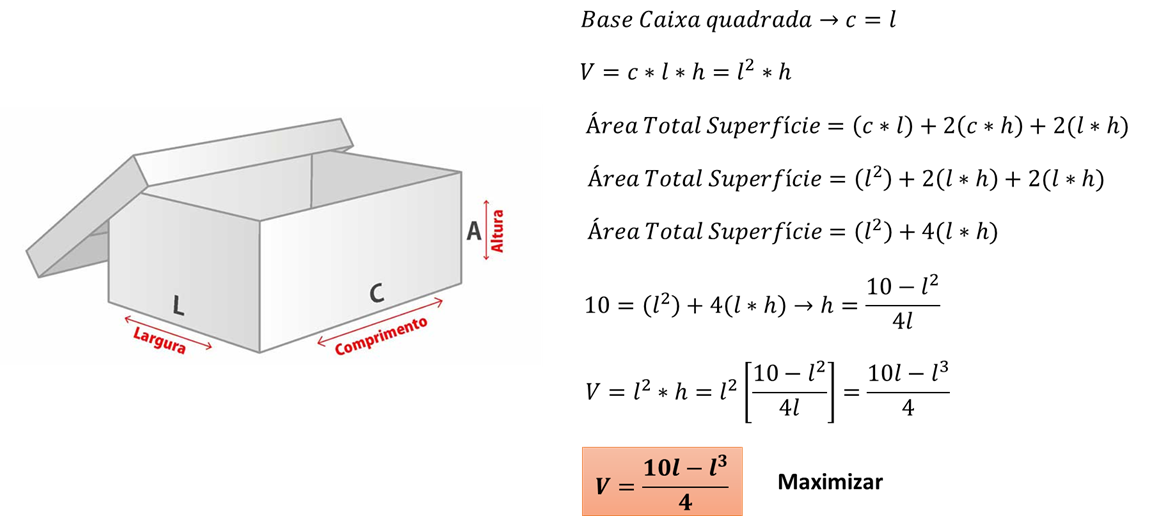

## Instalar pacote DEAP

In [17]:
!pip install deap

# Importar bibliotecas necessárias

In [18]:
import matplotlib.pyplot as plt
from deap import base, creator, tools
import operator
import random
import numpy
import math

## Partícula

part = [l]

   - **l**: largura

   
   
**Observação:** comprimento = largura

**Observação:** Altura: $h=(10-2l^2)/4l$


# Função objetivo

   - Função objetivo com objetivo de maximizar o volume

In [19]:
def objective_function(individual):
    volume = (10*individual[0]-individual[0]**3)/4
    return volume,

# Restrição do problema


- Verificar partícula - restrições impostas as partículas
  - Há uma restrição da Área Total de Superfície da caixa $\leq 10m^2$

In [20]:
#def feasible(individual):
#        if individual[0] > 10:
#          return False
#        return True
#
# Não tenho restrições pois a incluí na função objetivo.

## Criando a função de Minimização e a estrutura da partícula

In [21]:
#  função objetivo: nome, tipo(f.o.), o peso deve ser 1.0 para esse caso (função de maximização)
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Particle", list, fitness=creator.FitnessMin, speed=list, smin=None, smax=None, best=None)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Particle' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


## Definindo uma função para gerar a partícula

In [22]:
# Função que cria uma partícula inicializando os atributos aleatoriamente.
# size é o número de variáveis de decisão, pmin e pmax são os limites das variáveis, smin e smax são os limites de velocidade
def generate(size, pmin, pmax, smin, smax):
    part = creator.Particle(random.uniform(pmin, pmax) for _ in range(size)) 
    part.speed = [random.uniform(smin, smax) for _ in range(size)]
    part.smin = smin
    part.smax = smax
    return part

## Definindo a função para atualização da partícula 

In [23]:
# Esta função calcula a velocidade, os limites de veloicidade e a nova posição da partícula
# phi1 = fator cognitivo e phi2 = fator social
def updateParticle(part, best, phi1, phi2):
    u1 = (random.uniform(0, phi1) for _ in range(len(part)))
    u2 = (random.uniform(0, phi2) for _ in range(len(part)))
    v_u1 = map(operator.mul, u1, map(operator.sub, part.best, part)) # indo em direção ao melhor conhecido pela partícula
    v_u2 = map(operator.mul, u2, map(operator.sub, best, part)) # indo em direção ao melhor da vizinhaça
    part.speed = list(map(operator.add, part.speed, map(operator.add, v_u1, v_u2)))
    for i, speed in enumerate(part.speed):
        if abs(speed) < part.smin:
            part.speed[i] = math.copysign(part.smin, speed)
        elif abs(speed) > part.smax:
            part.speed[i] = math.copysign(part.smax, speed)
    part[:] = list(map(operator.add, part, part.speed))

## Criando o toolbox

In [24]:
toolbox = base.Toolbox()

# Função para gerar a partícula com valores 
toolbox.register("particle", generate, size=1, pmin=0, pmax=10, smin=-2, smax=2)

# Adicionando a função para gerar a população
toolbox.register("population", tools.initRepeat, list, toolbox.particle)

# Adicionando a função para atualizar a população
toolbox.register("update", updateParticle, phi1=2.0, phi2=2.0)

# Adicionando as funções para avaliar a população
toolbox.register("evaluate", objective_function)
#toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, -100000000))

## Definindo parêmetros para o PSO

   - **initial_population:** Número de inidivíduos da população inicial
   - **num_gen:** Número de iterações
   - **best:** Melhor partícula

In [25]:
initial_population = 100    
num_ite = 1000
best = None

### Criando a população inicial

In [26]:
# inicializando a população
pop = toolbox.population(n=initial_population)

### Estatísticas de avaliação (a cada geração)

   - Função objetivo
   - Média
   - Desvio padrão
   - Mínimo
   - Máximo

In [27]:
# estatísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

### Definindo um log para avaliar as partículas ao longo das iterações

In [28]:
logbook = tools.Logbook()
logbook.header = ["gen", "evals"] + stats.fields

## Otimização

In [29]:
# Roda a otimização
for iteration in range(num_ite):
    for part in pop:
        part.fitness.values = toolbox.evaluate(part)
        # atualiza melhor da partícula
        if not part.best or part.best.fitness < part.fitness:
            part.best = creator.Particle(part)
            part.best.fitness.values = part.fitness.values
        # atualiza melhor global
        if not best or best.fitness < part.fitness:
            best = creator.Particle(part)
            best.fitness.values = part.fitness.values
    for part in pop:
        toolbox.update(part, best)

    # Salva todos os fitnesses em uma lista e imprime o status
    logbook.record(gen=iteration, evals=len(pop), **stats.compile(pop))
    print(logbook.stream)

gen	evals	avg     	std    	min     	max    
0  	100  	-58.1696	66.4872	-215.053	3.04187
1  	100  	-26.5359	42.0693	-227.501	3.04279
2  	100  	-7.01377	17.9336	-109.571	3.04288
3  	100  	-0.117761	5.84293	-39.8475	3.0429 
4  	100  	1.2794   	1.92679	-6.33011	3.04288
5  	100  	0.628756 	2.50268	-7.86482	3.04246
6  	100  	0.616543 	2.95677	-13.0807	3.04287
7  	100  	0.529669 	3.11237	-12.4746	3.04285
8  	100  	1.27107  	2.06627	-8.8537 	3.04256
9  	100  	1.29243  	1.89069	-4.61495	3.0429 
10 	100  	1.06776  	2.28494	-7.80138	3.04277
11 	100  	1.13221  	2.32748	-7.17387	3.0429 
12 	100  	0.507689 	3.80316	-24.6988	3.04287
13 	100  	1.29644  	2.36965	-11.1621	3.04266
14 	100  	1.3112   	1.98562	-7.75671	3.04287
15 	100  	1.1797   	2.13293	-7.06721	3.04265
16 	100  	1.43237  	1.83626	-4.37615	3.0429 
17 	100  	1.01486  	2.48014	-11.543 	3.0429 
18 	100  	1.12514  	2.18764	-7.49237	3.0429 
19 	100  	1.25788  	2.60734	-11.3269	3.04264
20 	100  	0.806682 	3.32225	-23.9497	3.04287
21 	100  	1.49

## Melhor indivíduo

In [33]:
print('Largura: ', best[0])
print('Comprimento: ', best[0])
print('Altura: ', (10-best[0]**2)/(4*best[0]))

Largura:  1.8257417122583377
Comprimento:  1.8257417122583377
Altura:  0.9128710752675017


## Avaliação do melhor indivíduo

In [31]:
print('Volume: ',objective_function(best))

Volume:  (3.0429030972508935,)


In [32]:
h = (10-best[0]**2)/(4*best[0])
print('Área Superficie Total: ', best[0]**2+4*best[0]*h)

Área Superficie Total:  10.0
